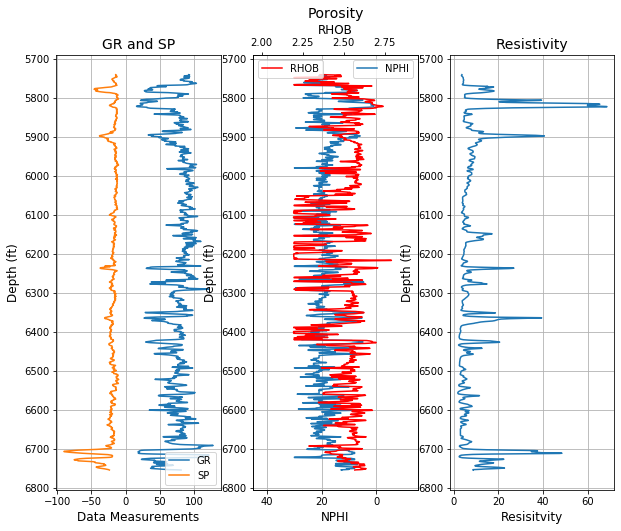

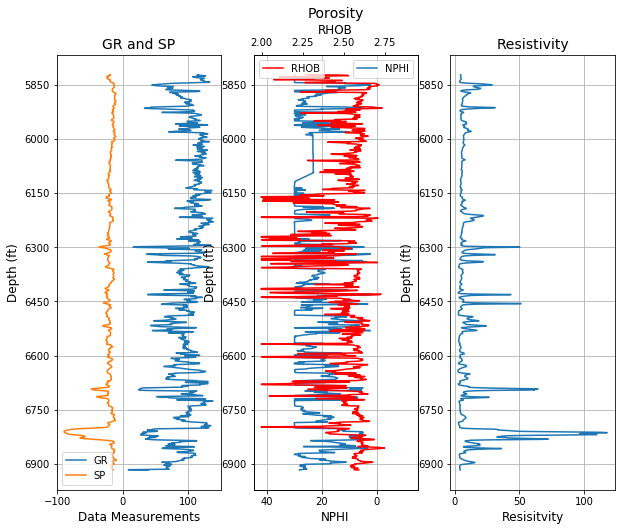

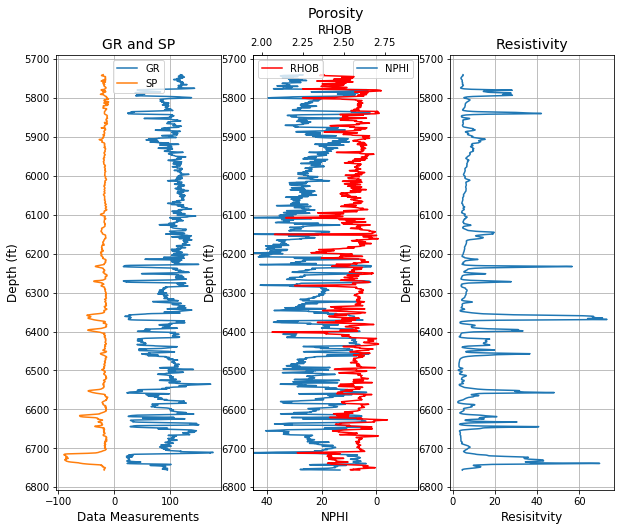

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

def wellLog(dataName):
    #reading in data frame and datum
    wellData = pd.read_csv(dataName, header = 1)
    textObj = open(dataName, 'r')
    datum = float(textObj.readline())
    
    #cleaning data (removing null values)
    wellData = wellData.drop(wellData[wellData.GR == -99999.0000].index)
    wellData = wellData.drop(wellData[wellData.SP == -99999.0000].index)
    wellData = wellData.drop(wellData[wellData.NPHI == -99999.0000].index)
    wellData = wellData.drop(wellData[wellData.RHOB == -99999.0000].index)
    wellData = wellData.drop(wellData[wellData.RILD == -99999.0000].index)
    
    #adding Datum to depth
    for row in wellData.index:
        wellData.loc[row, 'DEPTH'] = float(wellData.loc[row, 'DEPTH'])+datum
    
    #plotting GR/SP
    fig = plt.figure(figsize=(10,8))
    ax = fig.add_subplot(131)
    ax.plot(wellData['GR'], wellData['DEPTH'], label=r"GR")
    ax.plot(wellData['SP'], wellData['DEPTH'], label=r"SP")
    ax.set_xlabel(r"Data Measurements", fontsize=12)
    ax.set_ylabel(r"Depth (ft)",fontsize=12)
    ax.set_title("GR and SP",fontsize=14)
    ax.yaxis.set_major_locator(plt.MaxNLocator(12))
    # Invert the y-axis
    ax.invert_yaxis()
    ax.grid()
    
    ax.legend()

    #plotting Densities
    ax1 = fig.add_subplot(132)
    ax1.plot(wellData['NPHI'], wellData['DEPTH'], label=r"NPHI")
    ax2 = ax1.twiny()
    ax2.plot(wellData['RHOB'], wellData['DEPTH'], '-r', label=r"RHOB")
    ax1.set_xlabel(r"NPHI", fontsize=12)
    ax1.set_xlim(-15, 45)
    ax2.set_xlabel(r"RHOB", fontsize=12)
    ax2.set_xlim(1.95, 2.95)
    ax1.set_ylabel(r"Depth (ft)",fontsize=12)
    ax1.set_title("Porosity",fontsize=14)
    # Invert the y-axis
    ax1.yaxis.set_major_locator(plt.MaxNLocator(12))
    ax1.invert_yaxis()
    ax1.invert_xaxis()
    ax1.grid()
    
    ax1.legend(loc = 0)
    ax2.legend(loc = 2)
    
    #plotting resistivity
    ax3 = fig.add_subplot(133)
    ax3.plot(wellData['RILD'], wellData['DEPTH'], label=r"RILD")
    ax3.set_xlabel(r"Resisitvity", fontsize=12)
    ax3.set_ylabel(r"Depth (ft)",fontsize=12)
    ax3.set_title("Resistivity",fontsize=14)
    ax3.yaxis.set_major_locator(plt.MaxNLocator(12))
    # Invert the y-axis
    ax3.invert_yaxis()
    ax3.grid()
    
    return

wellLog('by13.txt')
wellLog('by15.txt')
wellLog('by18.txt')
